<img src="logo.png" alt="Logo IFNMG" width="200">
<h1 style="text-align:center;"> Tópicos em IC: Análise exploratória de dados.</h1>
<p>Equipe: David Jansen, Iarah Gonçalves de Almeida, Paulo Borges</p>

<h2>1) Introdução</h2>
<p> A análise de dados será feita sobre o 
<a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29">Breast Cancer Wisconsin (Prognostic) Data Set.</a> A manipulação dos dados para análise será feita utilizando a linguagem Python no ambiente Jupyter.</p>

<h2>2) Informação dos Atributos </h2>

<p> 1) ID number </p>

<p> 2) Outcome (R = recur, N = nonrecur) </p>

<p> 3) Time (recurrence time if field 2 = R, disease-free time if field 2	= N) </p>

<p> 4-33) Ten real-valued features are computed for each cell nucleus: </p>

<ol>
    <li> radius (mean of distances from center to points on the perimeter) </li>
    <li> texture (standard deviation of gray-scale values) </li>
    <li> perimeter </li>
    <li> area </li>
	<li> smoothness (local variation in radius lengths) </li>
	<li> compactness (perimeter^2 / area - 1.0) </li>
	<li> concavity (severity of concave portions of the contour) </li>
	<li> concave points (number of concave portions of the contour) </li>
	<li> symmetry </li>
	<li> fractal dimension ("coastline approximation" - 1) </li>
</ol>

<p> Several of the papers listed above contain detailed descriptions of how these features are computed. </p>

<p>The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 4 is Mean Radius, field 14 is Radius SE, field 24 is Worst Radius. </p>

<p> Values for features 4-33 are recoded with four significant digits. <p>

<p> 34) Tumor size - diameter of the excised tumor in centimeters </p>
<p> 35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery. </p>

<h2>3) Preparação do Ambiente Jupyter</h2>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [61]:
#URL onde se encontra a base de dados.
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'

#Nomeação das colunas.
names = ['id_number', 'outcome', 'time', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

#Leitura do arquivo para o formato csv.
wpbc = pd.read_csv(urlopen(UCI_data_URL), names=names)

#Mostrando resultado em forma de tabela (10 primeiros).
wpbc.head(10)

,id_number,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


<h2>4) Tratamento do Conjunto de Dados para análise</h2>

<p> O atributo 'outcome' está representado com um objeto string. Faremos um mapeamento do atributo para valores numéricos, onde N = 0.0 e R = 1.0. Isso ajuda na plotagem de gráficos e na aplicação de alguns modelos.</p>

<p> Algumas informações podem ser obtidadas através do arquivo <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names">wpbc.names</a>:</p>

<ul>
    <li> O atributo 'lymph_node_status' está ausente em 4 amostras.</li>
    <li> 151 amostras não apresentam recorrência('outcome' = 0), 47 apresentam recorrência('outcome' = 1).</li>
</ul>

<p> Dada a primeira informação na lista acima, iremos retirar essas 4 amostras de nossa análise.</p>

<p> As entradas da tabela serão passadas para o formato <b><i>float64</i></b>.<p>
    
<p> As colunas <b><i>id_number, time</i></b> serão removidas do nosso conjunto de dados por não se tratarem de informações relevantes em nossa análise.

In [62]:
# Mapeia a coluna 'outcome' para valores numéricos, 'R' de recur será 1, 'N' de nonrecur será 0
wpbc['outcome'] = wpbc['outcome'].map({'R':1.0, 'N':0.0})

# Retira os 4 valores null da coluna 'lymph_node_status'
wpbc = wpbc[wpbc['lymph_node_status'] != '?']

# Converte todo o dataframe para float64
wpbc = wpbc.astype('float64')

#Removendo colunas "id_number" e "time"
wpbc = wpbc.drop(columns=['id_number', 'time'])

wpbc.head(10)

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,0.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,0.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
5,1.0,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
7,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10.0
8,0.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1.0
9,0.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20.0
10,0.0,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0.0


<h2>5) Informações da tabela </h2>

<p> Podemos ter mais algumas informações estatísticas do conjunto de dados, usando a função <b><i>describe</i></b>. Informações dos tipos de dados, podem ser obtidos com a função <b><i>info</i></b>.</p>

In [63]:
wpbc.describe()

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.237113,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,0.426413,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,0.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,0.000000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,0.000000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,0.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,1.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [64]:
wpbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 33 columns):
outcome                    194 non-null float64
radius_mean                194 non-null float64
texture_mean               194 non-null float64
perimeter_mean             194 non-null float64
area_mean                  194 non-null float64
smoothness_mean            194 non-null float64
compactness_mean           194 non-null float64
concavity_mean             194 non-null float64
concave_points_mean        194 non-null float64
symmetry_mean              194 non-null float64
fractal_dimension_mean     194 non-null float64
radius_se                  194 non-null float64
texture_se                 194 non-null float64
perimeter_se               194 non-null float64
area_se                    194 non-null float64
smoothness_se              194 non-null float64
compactness_se             194 non-null float64
concavity_se               194 non-null float64
concave_points_se          194 

<h2>6) Exploração de Dados</h2>

<p>Em nosso <a href="https://github.com/DWalterJansen/topicosIC/blob/master/Equipe/Trabalho%20Intermedi%C3%A1rio/trabalho_intermediario.ipynb">trabalho intermediário</a>, analisamos apenas as caracteristicas de valor médio(_mean), tumor_size, e lymph_node_status para avaliar a influência na recorrência ou não recorrência do cancêr de mama. Os resultados lá obtidos, nos motivaram à apronfunar na análise. Nessa versão final do trabalho para a disciplina, iremos aumentar o número de características observadas e aplica-lás em alguns modelos de classificação.</p>

<p>A fim de identificar outras caracterísitcas que mais impactam na recorrência, podemos plotar histogramas das classes recorrentes e não recorrentes. Se esses histogramas estão separados com base na característica, podemos dizer que essa característica é importante para distinguir a recorrência do câncer.</p>

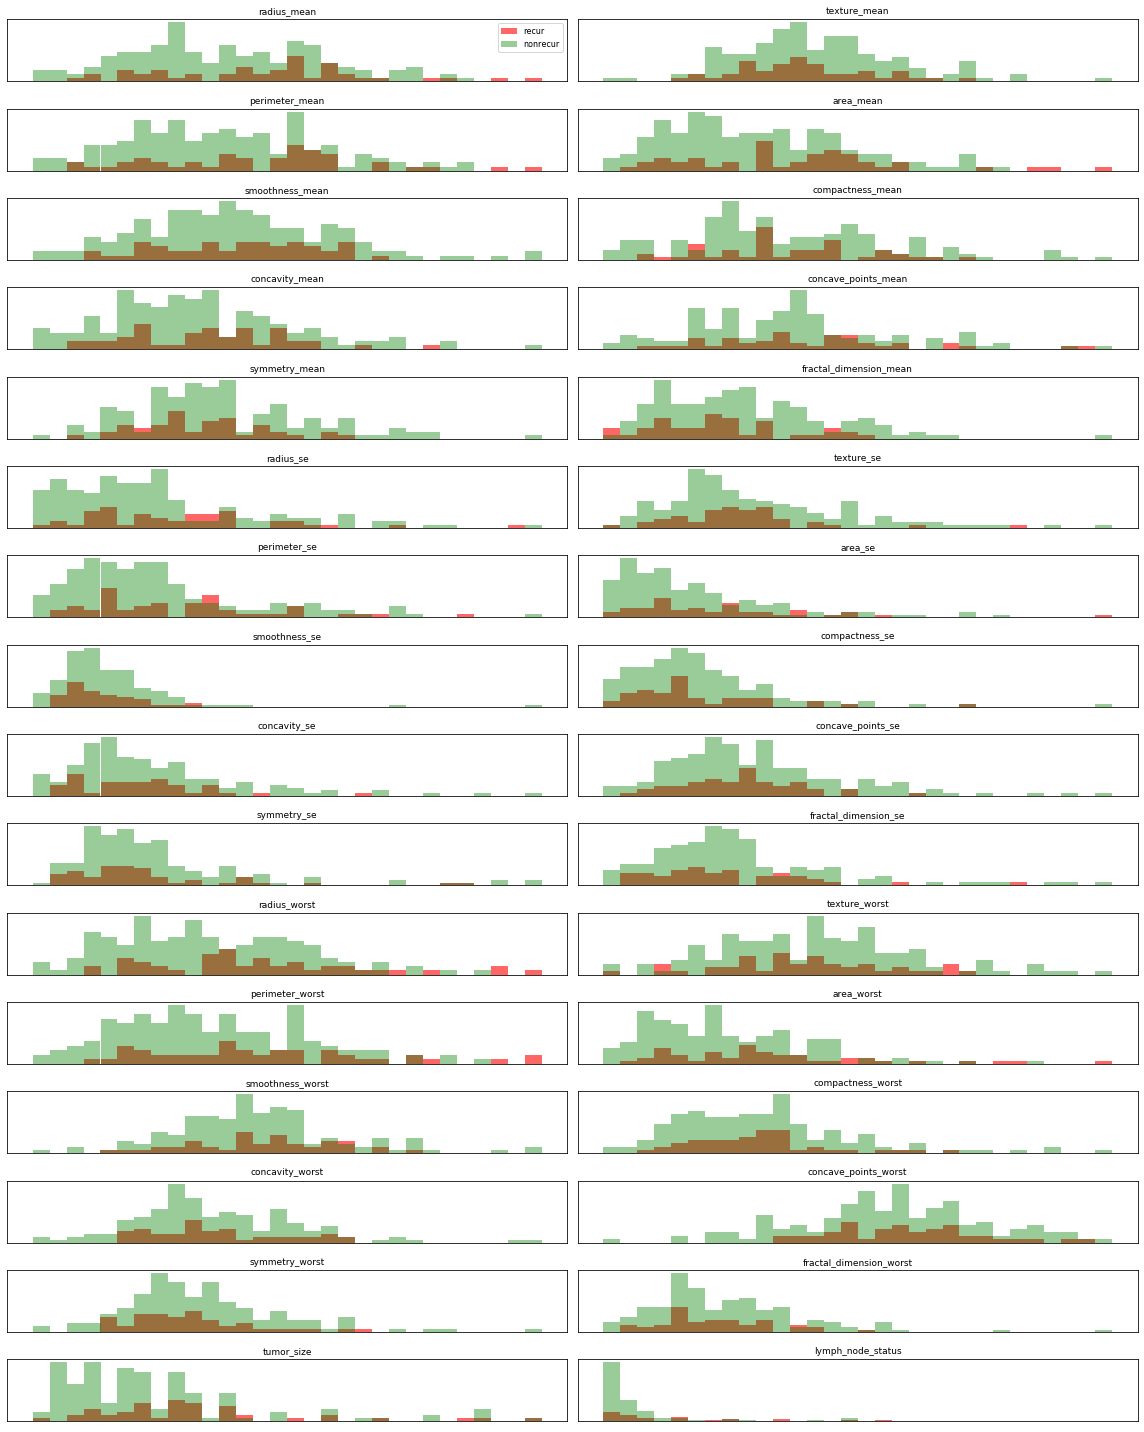

In [65]:
fig, axes = plt.subplots(16,2, figsize=(16, 20)) # 2 colounas com cada uma contendo 16 figuras, totalizando 32 características

recur = wpbc[wpbc.outcome == 1] # define a classe recorrente
nonrecur = wpbc[wpbc.outcome == 0] # define a classe não recorrente

ax = axes.ravel() # eixos achatados

for i in range(32):
  _, bins = np.histogram(wpbc.values[:, i + 1], bins = 30) # i + 1 para remover a coluna outcome
  ax[i].hist(recur.values[:, i + 1], bins = bins, color = 'r', alpha = 0.6) # vermelho para a classe recorrente
  ax[i].hist(nonrecur.values[:, i + 1], bins = bins, color = 'g', alpha = 0.4) # o valor alpha determina a transparência para a região sobreposta
  ax[i].set_title(names[i + 3], fontsize = 9) # i + 3 para remover as colunas id_number, outcome e time
  ax[i].axes.get_xaxis().set_visible(False) # o eixo x não nos é útil, uma vez que só desejamos ver a separação das classes
  ax[i].set_yticks(())

ax[0].legend(['recur', 'nonrecur'], loc = 'best', fontsize = 8)
plt.tight_layout()
plt.show()

<p>Pela separação dos histogramas acima, podemos identificar que algumas características possam ter maior influência no resultado (<b><i>outcome</b></i>), como <b><i>radius_mean</b></i>, <b><i>perimeter_mean</b></i>, <b><i>area_mean</b></i>, <b><i>radius_worst</b></i>, <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>.</p>

<h3>6.1) Floresta Aleatória com conjunto de treinamento e teste</h3>

<p>Iniciamos usando uma <b><i>RandomForestClassifier</i></b> aplicada ao nosso dataframe <b><i>wpbc</i></b>, onde usaremos as 32 caracterísicas para fazer a predição do valor na coluna <b><i>outcome</i></b>.

<h4>6.1.1) Procedimentos para classificação</h4>

<p>Primeiramente, vamos separar nossas colunas em dependentes e independentes, e então separar o cojunto de treinamento (70% das amostras) e o conjunto de teste (30% das amostras):</p>

In [103]:
# Separa as colunas em dependentes e independentes

from sklearn.model_selection import train_test_split

namesrfc = ['radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

X = wpbc[namesrfc]  # Características
y = wpbc['outcome']  # Rótulo

# Separa os dados em conjunto de treinamento e conjunto de teste
# 70% das amostras destinadas para o treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h4>6.1.2) Treinamento do Modelo e Resultado do treinamento</h4>

<p>Depois de separarmos os conjuntos, podemos aplicar o treinamento. Em seguida, verificamos a precisão do modelo, que nos diz quão frequente nosso classificador estará correto:</p>

In [104]:
# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier

# Cria um classificador gaussiano
clf = RandomForestClassifier(n_estimators = 200)

# Treina o modelo usando o conjunto de treinamento
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Importa 'metrics' de 'sklearn'
from sklearn import metrics
# Modelo de precisão, que diz quão frequente o classificador está correto
print("Precisão:", metrics.accuracy_score(y_test, y_pred))

Precisão: 0.8305084745762712


<h4>6.1.3) Variáveis:</h4>

<p>Abaixo exibimos o valor das variáveis que obtiveram o resultado acima:</p>

In [105]:
#Conjunto de treinamento para X
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
17         21.16         23.04          137.20     1404.0          0.09428   
143        15.50         21.08          102.90      803.1          0.11200   
141        17.99         20.66          117.80      991.7          0.10360   
77         15.70         20.31          101.20      766.6          0.09597   
59         19.00         18.91          123.40     1138.0          0.08217   
113        20.73         31.12          135.70     1419.0          0.09469   
76         21.09         26.57          142.70     1311.0          0.11410   
168        15.22         30.62          103.40      716.9          0.10480   
163        15.05         19.07           97.26      701.9          0.09215   
20         14.58         21.53           97.41      644.8          0.10540   
65         16.11         18.05          105.10      813.0          0.09721   
152        19.59         25.00          127.70     1191.0       

In [106]:
#Conjunto de teste para X
print(X_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
129        19.68         21.68          129.90     1194.0          0.09797   
35         13.28         20.28           87.32      545.2          0.10410   
40         19.21         18.57          125.50     1152.0          0.10530   
68         19.89         16.89          130.20     1229.0          0.10050   
18         16.65         21.38          110.00      904.6          0.11210   
26         19.27         26.47          127.90     1162.0          0.09401   
190        19.96         27.41          130.80     1238.0          0.09075   
138        14.60         23.29           93.97      664.7          0.08682   
70         23.27         22.04          152.10     1686.0          0.08439   
102        17.30         17.08          113.00      928.2          0.10080   
182        15.66         24.51          102.00      771.1          0.08886   
120        19.53         18.90          129.50     1217.0       

In [107]:
#Conjunto de treinamento para y
print(y_train)

17     1.0
143    1.0
141    0.0
77     0.0
59     1.0
113    0.0
76     0.0
168    0.0
163    0.0
20     0.0
65     0.0
152    1.0
111    0.0
31     0.0
106    0.0
125    1.0
74     0.0
79     0.0
55     0.0
46     1.0
66     0.0
8      0.0
171    0.0
71     0.0
44     0.0
156    0.0
110    1.0
115    0.0
181    0.0
93     0.0
      ... 
147    1.0
51     0.0
43     1.0
118    0.0
179    0.0
192    0.0
56     1.0
151    0.0
58     0.0
34     1.0
161    1.0
62     1.0
72     0.0
105    1.0
134    0.0
33     0.0
57     0.0
159    1.0
98     0.0
126    0.0
83     0.0
158    0.0
109    1.0
78     0.0
177    1.0
183    0.0
142    0.0
15     1.0
95     0.0
41     0.0
Name: outcome, Length: 135, dtype: float64


In [108]:
#Conjunto de teste para y
print(y_test)

129    1.0
35     0.0
40     1.0
68     0.0
18     0.0
26     0.0
190    0.0
138    0.0
70     0.0
102    0.0
182    0.0
120    1.0
5      1.0
137    0.0
49     0.0
47     0.0
52     0.0
195    0.0
1      0.0
64     0.0
193    0.0
91     0.0
90     0.0
122    0.0
146    0.0
173    0.0
100    0.0
45     0.0
140    0.0
69     1.0
170    0.0
73     0.0
22     0.0
38     0.0
107    0.0
99     0.0
169    0.0
21     0.0
48     1.0
14     0.0
67     1.0
121    0.0
53     0.0
54     0.0
88     1.0
12     0.0
174    0.0
154    0.0
172    0.0
50     1.0
186    0.0
164    0.0
135    1.0
27     0.0
180    0.0
61     0.0
108    0.0
60     0.0
2      0.0
Name: outcome, dtype: float64


In [109]:
#Conjunto para predição
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h4>6.1.4) Importância das Variáveis:</h4>

<p>Uma outra importante funcionalidade da <b><i>RandomForestClassifier</i></b> é a possibilidade de exibirmos a importância das características para o modelo.</p>

In [110]:
# Ordenação das as características importantes pela pontuação
print("Características ordenadas pela pontuação:")
# O número dentro de round é o limite de casas decimais
result = sorted(zip(map(lambda x: round(x, 6), clf.feature_importances_), namesrfc), reverse=True)
print(result)

# Criando dataframe com o resultado
df = pd.DataFrame(data=result)
df = df.rename(index=str, columns={0: "importance", 1: "feature"})

Características ordenadas pela pontuação:
[(0.054293, 'lymph_node_status'), (0.043254, 'smoothness_worst'), (0.039651, 'symmetry_se'), (0.03756, 'perimeter_worst'), (0.037316, 'texture_worst'), (0.037096, 'fractal_dimension_mean'), (0.035977, 'radius_se'), (0.035549, 'perimeter_se'), (0.033923, 'concavity_worst'), (0.033606, 'texture_se'), (0.033302, 'concavity_se'), (0.032887, 'perimeter_mean'), (0.032342, 'radius_worst'), (0.031676, 'compactness_se'), (0.03146, 'smoothness_mean'), (0.031175, 'concave_points_worst'), (0.029516, 'symmetry_mean'), (0.029444, 'smoothness_se'), (0.02935, 'area_worst'), (0.029224, 'tumor_size'), (0.029218, 'area_se'), (0.029092, 'concavity_mean'), (0.028407, 'symmetry_worst'), (0.028101, 'texture_mean'), (0.027999, 'concave_points_se'), (0.025497, 'compactness_mean'), (0.024869, 'fractal_dimension_se'), (0.023075, 'area_mean'), (0.021946, 'fractal_dimension_worst'), (0.021839, 'concave_points_mean'), (0.020891, 'compactness_worst'), (0.020464, 'radius_mean

<p>Exibindo a ordenação na forma gráfica.<p>

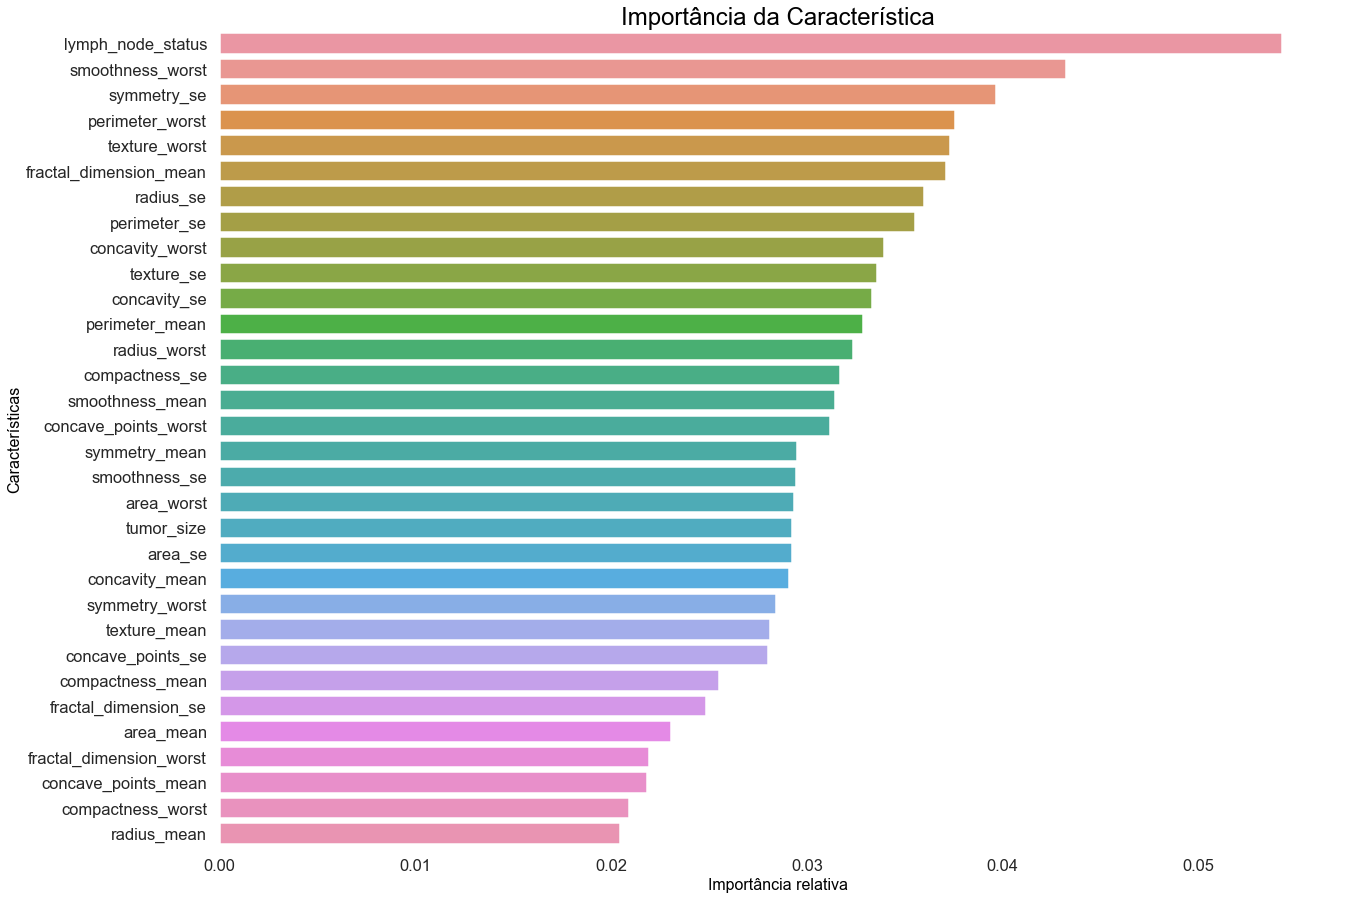

In [111]:
import matplotlib.pyplot as plt

sns.set_color_codes("dark")
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(20,15))
g = sns.barplot(x="importance", y="feature", data=df)
g.axes.set_title('Importância da Característica', fontsize=24,color="black",alpha=2)
g.set_xlabel("Importância relativa", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

<h3>6.2) Correlação</h3>

<p>Nossa base de dados possui muitas características, portando iremos tentar reduzir essa quantidade olhando para os atributos correlacionados.</p>

Podemos visualizar a correalação das características que separamos nos histogramas (<b><i>radius_mean</b></i>, <b><i>perimeter_mean</b></i>, <b><i>area_mean</b></i>, <b><i>radius_worst</b></i>, <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>) através do seguinte gráfico:</p>

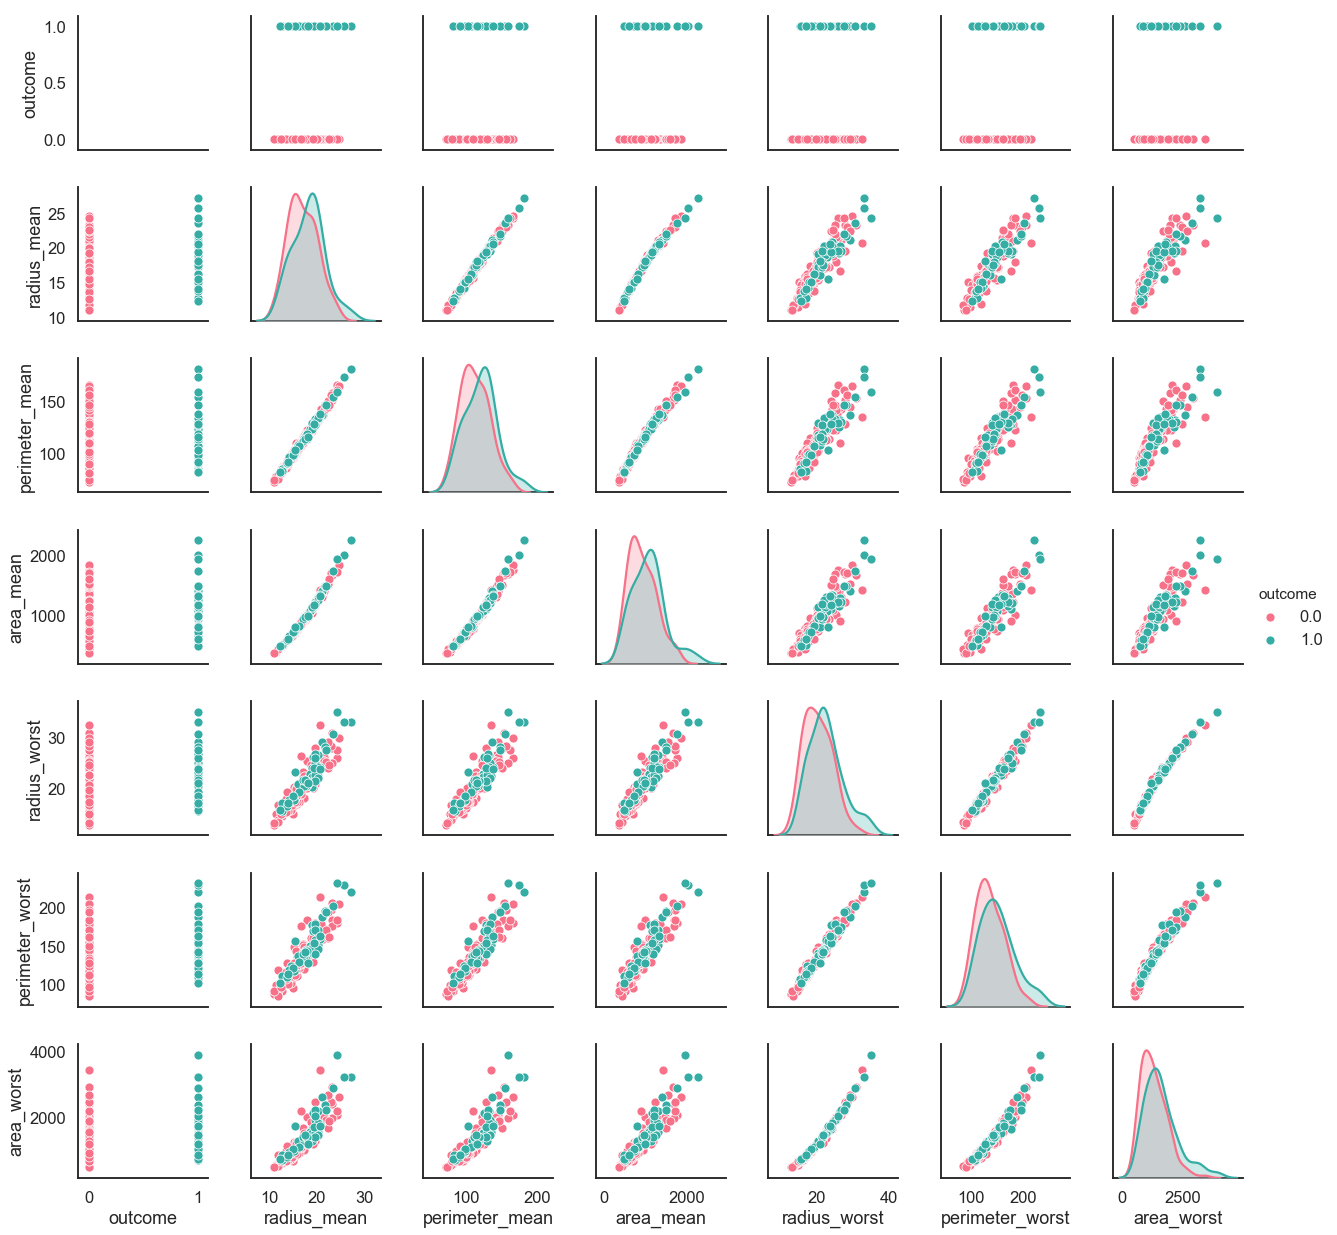

In [113]:
# Identificação de correlações
# Seleciona sete colunas de destaque na seção 6
selected = wpbc[['outcome', 'radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']]

# Exibe gráfico para identificar correlações
sns.pairplot(selected, hue='outcome', palette="husl")

<p>Visualmente, podemos ver que algumas dessas características parecem correlatas, como <b><i>radius_mean</b></i> com <b><i>area_mean</b></i> e <b><i>perimeter_mean</b></i>, ou <b><i>radius_worst</b><i> com <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>.</p>

<p>Podemos aprofundar um pouco mais na exploração da correlação de características com um mapa de calor:</p>

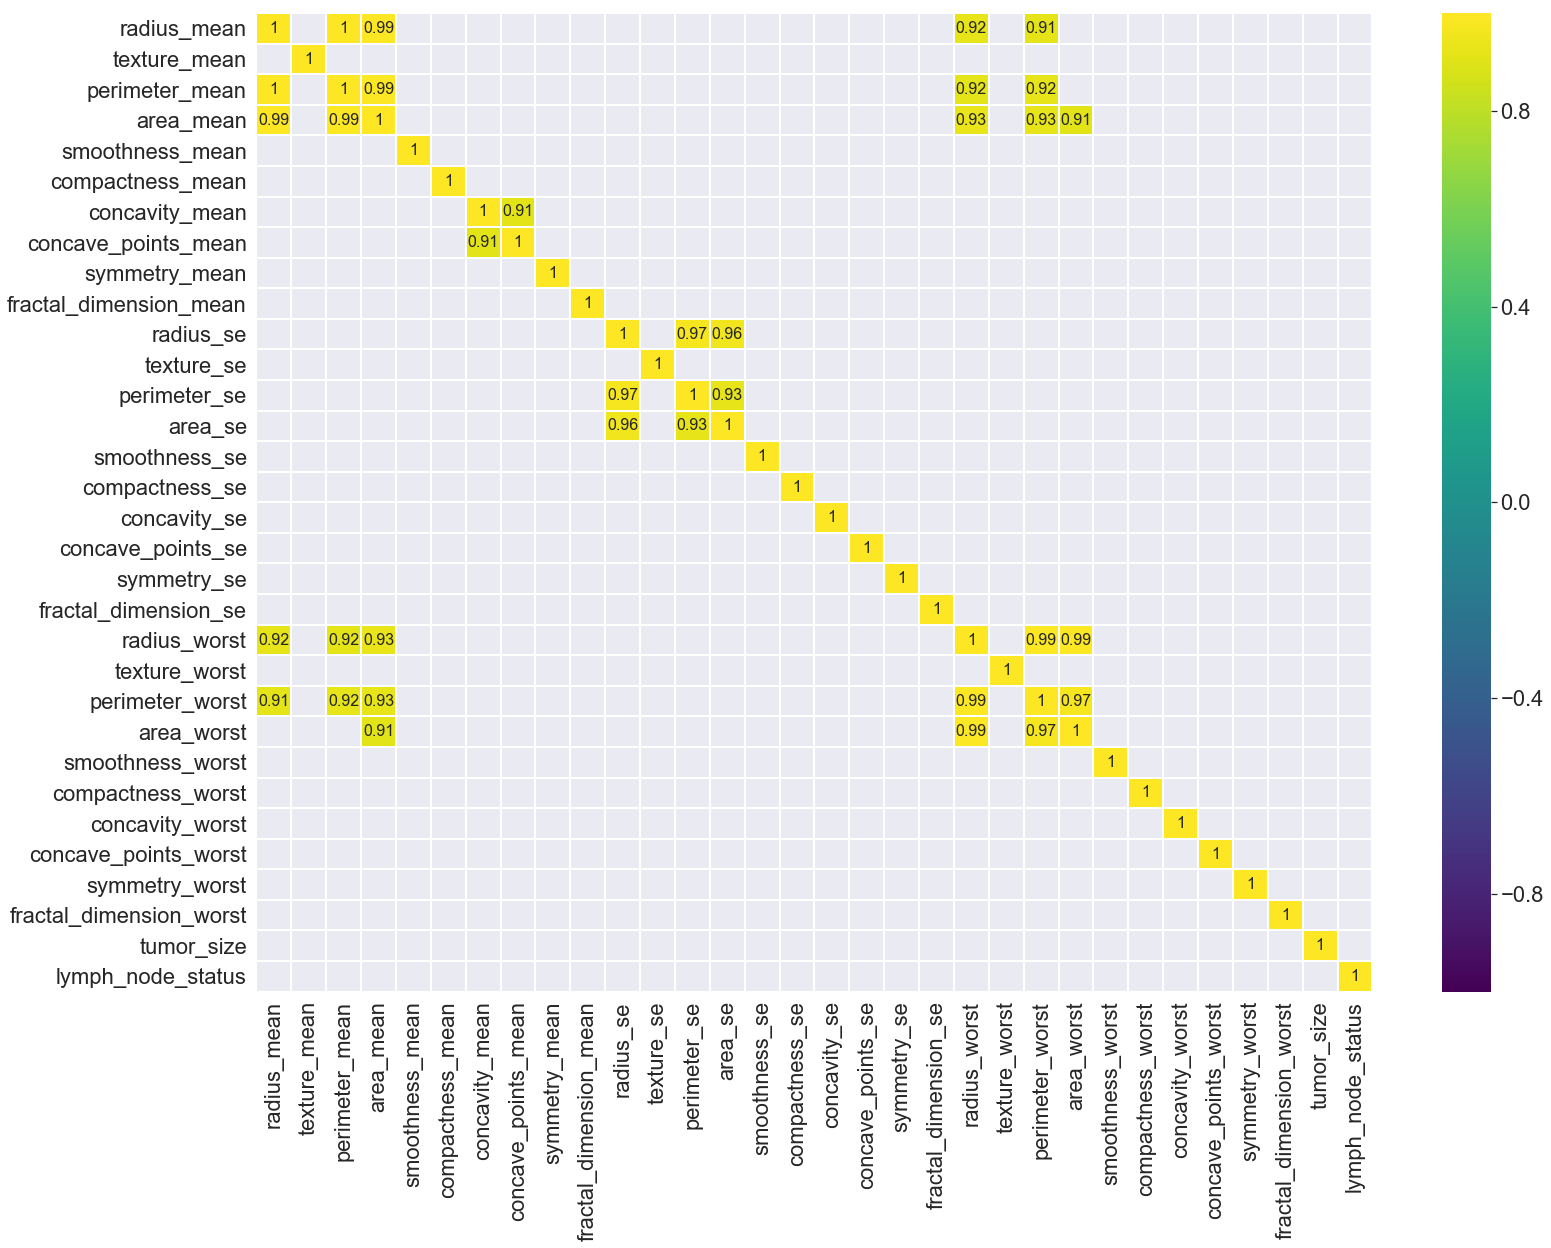

In [114]:
# Gerando a correlação das características
corr = wpbc.drop('outcome', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(25, 18))
sns.set_context("poster")
sns.set(font_scale=2.0)


# Exibindo as correlações maiores que 0.75 e menor que -0.75
c = sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 16}, square=False);

<h3>6.3) Seleção de correlações</h3>

<p>Na matriz quadrada acima, quanto mais próximo do <b><i>1(cor amarela)</i></b> e quanto mais próximo do <b><i>-1(cor roxa)</i></b>, mais forte é a correlação.</p>

<p>Excetuando as entradas da diagonal principal, iremos olhar para os pares de características que fornecem as coordenadas para entradas com valor maior que <b><i>0.9</i></b> ou inferiores a <b><i>-0.9</i></b>. Pela imagem acima, encontramos os sequintes pares de caractrísticas que atendem a esse requisto:

<ul>
    <li>perimeter_mean e radius_mean</li>
    <li>area_mean e radius_mean</li>
    <li>area_mean e perimeter_mean</li>
    <li>concave_points_mean e concavity_mean</li>
    <li>perimeter_se e radius_se</li>
    <li>area_se e radius_se</li>
    <li>area_se e perimeter_se</li> 
    <li>radius_worst e radius_mean</li>
    <li>radius_worst e perimeter_mean</li>
    <li>radius_worst e area_mean</li>
    <li>perimeter_worst e radius_mean</li>
    <li>perimeter_worst e perimeter_mea</li>
    <li>perimeter_worst e area_mean</li>
    <li>perimeter_worst e radius_worst</li>
    <li>area_worst e area_mean</li>
    <li>area_worst e radius_worst</li>
    <li>area_worst e perimeter_worst</li>
</ul>


<h3>6.4) Critério de remoção</h3>
    
<p>Dado um par de características correlacionadas (6.3), será eliminada aquela de menor importância na <b><i>RandomForestClassifier</i></b> (6.1.3). Serão removidas:</p>
<ul>
    <li>perimeter_mean</li>
    <li>area_mean</li>
    <li>radius_worst</li>
    <li>concavity_mean</li>
    <li>perimeter_se</li>
    <li>area_se</li>
    <li>perimeter_worst</li>
    
</ul>

<h3>6.5) Floresta Aleatória após redução de características por correlação</h3>

<p>Agora que sabemos quais características podemos remover, iremos refazer o treinamento com a Floresta Aleatória para tentar melhorar a precisão do nosso modelo.</p>

In [115]:
# Criando novo DataFrame com menos características
data = wpbc.drop(columns=['perimeter_mean', 'area_mean', 'radius_worst', 'concavity_mean',
                          'perimeter_se', 'area_se', 'perimeter_worst'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 26 columns):
outcome                    194 non-null float64
radius_mean                194 non-null float64
texture_mean               194 non-null float64
smoothness_mean            194 non-null float64
compactness_mean           194 non-null float64
concave_points_mean        194 non-null float64
symmetry_mean              194 non-null float64
fractal_dimension_mean     194 non-null float64
radius_se                  194 non-null float64
texture_se                 194 non-null float64
smoothness_se              194 non-null float64
compactness_se             194 non-null float64
concavity_se               194 non-null float64
concave_points_se          194 non-null float64
symmetry_se                194 non-null float64
fractal_dimension_se       194 non-null float64
texture_worst              194 non-null float64
area_worst                 194 non-null float64
smoothness_worst           194 

<h4>6.5.1) Procedimentos para classificação</h4>

<p>Primeiramente, vamos separar nossas colunas em dependentes e independentes, e então separar o cojunto de treinamento (70% das amostras) e o conjunto de teste (30% das amostras):</p>

In [179]:
# Separa as colunas em dependentes e independentes

from sklearn.model_selection import train_test_split

namesrfc2 = list(data.columns.values[1:])

X2 = wpbc[namesrfc2]  # Características
y2 = wpbc['outcome']  # Rótulo

# Separa os dados em conjunto de treinamento e conjunto de teste
# 70% das amostras destinadas para o treinamento e 30% para teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

<h4>6.5.2) Treinamento do Modelo e Resultado do treinamento</h4>

<p>Depois de separarmos os conjuntos, podemos aplicar o treinamento. Em seguida, verificamos a precisão do modelo, que nos diz quão frequente nosso classificador estará correto:</p>

In [180]:
# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'usklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier

# Cria um classificador gaussiano
clf2 = RandomForestClassifier(n_estimators = 200)

# Treina o modelo usando o conjunto de treinamento
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

# Importa 'metrics' de 'sklearn'
from sklearn import metrics
# Modelo de precisão, que diz quão frequente o classificador está correto
print("Precisão:", metrics.accuracy_score(y_test2, y_pred2))

Precisão: 0.847457627118644


<h4>6.5.3) Variáveis:</h4>

<p>Abaixo exibimos o valor das variáveis que obtiveram o resultado acima:</p>

In [181]:
#Conjunto de treinamento para X
print(X_train2)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
11         15.78         17.89          0.09710           0.12920   
150        17.75         28.03          0.09997           0.13140   
40         19.21         18.57          0.10530           0.12670   
60         19.79         25.12          0.10150           0.15890   
73         13.43         19.63          0.09048           0.06288   
7          13.71         20.83          0.11890           0.16450   
128        23.51         24.27          0.10690           0.12830   
59         19.00         18.91          0.08217           0.08028   
141        17.99         20.66          0.10360           0.13040   
15         16.13         20.68          0.11700           0.20220   
154        16.25         19.51          0.10260           0.18930   
191        19.22         27.18          0.10900           0.17770   
98         20.51         27.81          0.09159           0.10740   
187        22.41         29.95    

In [182]:
#Conjunto de teste para X
print(X_test2)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
74         15.46         11.89          0.12570           0.15550   
133        20.44         21.78          0.09150           0.11310   
122        18.22         18.87          0.09746           0.11170   
53         13.11         15.56          0.13980           0.17650   
197        16.70         28.13          0.08896           0.11310   
118        16.24         18.77          0.10660           0.18020   
140        21.61         22.28          0.11670           0.20870   
44         14.78         23.94          0.11720           0.14790   
106        15.32         17.27          0.13350           0.22840   
82         14.86         23.21          0.10440           0.19800   
32         13.44         21.58          0.08162           0.06031   
100        17.46         39.28          0.09812           0.12980   
18         16.65         21.38          0.11210           0.14570   
33         10.95         21.35    

In [183]:
#Conjunto de treinamento para y
print(y_train2)

11     0.0
150    1.0
40     1.0
60     0.0
73     0.0
7      1.0
128    1.0
59     1.0
141    0.0
15     1.0
154    0.0
191    0.0
98     0.0
187    0.0
162    0.0
97     0.0
14     0.0
56     1.0
8      0.0
10     0.0
113    0.0
21     0.0
4      1.0
131    1.0
168    0.0
66     0.0
46     1.0
34     1.0
193    0.0
179    0.0
      ... 
182    0.0
126    0.0
123    0.0
77     0.0
79     0.0
109    1.0
80     0.0
119    0.0
51     0.0
38     0.0
64     0.0
137    0.0
121    0.0
164    0.0
139    0.0
129    1.0
68     0.0
151    0.0
124    0.0
163    0.0
78     0.0
194    0.0
84     0.0
152    1.0
192    0.0
61     0.0
171    0.0
184    0.0
157    1.0
92     0.0
Name: outcome, Length: 135, dtype: float64


In [184]:
#Conjunto de teste para y
print(y_test2)

74     0.0
133    0.0
122    0.0
53     0.0
197    0.0
118    0.0
140    0.0
44     0.0
106    0.0
82     0.0
32     0.0
100    0.0
18     0.0
33     0.0
47     0.0
149    0.0
132    1.0
93     0.0
173    0.0
177    1.0
72     0.0
41     0.0
31     0.0
20     0.0
23     0.0
107    0.0
145    1.0
36     0.0
96     0.0
26     0.0
101    0.0
65     0.0
146    0.0
167    0.0
39     1.0
57     0.0
2      0.0
169    0.0
88     1.0
181    0.0
42     1.0
127    0.0
178    0.0
135    1.0
43     1.0
95     0.0
94     0.0
186    0.0
3      0.0
90     0.0
188    0.0
108    0.0
144    0.0
99     0.0
69     1.0
91     0.0
63     0.0
160    0.0
172    0.0
Name: outcome, dtype: float64


In [185]:
#Conjunto para predição
print(y_pred2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h4>6.5.4) Importância das Variáveis:</h4>

<p>Assim como fizemos para o modelo que usava todas as variáveis, iremos usar a <b><i>RandomForestClassifier</i></b> para verificar a importância das variáveis no modelo.</p>

In [186]:
# Ordenação das as características importantes pela pontuação
print("Características ordenadas pela pontuação:")
# O número dentro de round é o limite de casas decimais
result2 = sorted(zip(map(lambda x: round(x, 6), clf2.feature_importances_), namesrfc2), reverse=True)
print(result2)

# Criando dataframe com o resultado
df2 = pd.DataFrame(data=result2)
df2 = df2.rename(index=str, columns={0: "importance", 1: "feature"})

Características ordenadas pela pontuação:
[(0.072156, 'area_worst'), (0.061146, 'radius_se'), (0.051984, 'lymph_node_status'), (0.048646, 'texture_worst'), (0.04565, 'radius_mean'), (0.043225, 'texture_se'), (0.042425, 'tumor_size'), (0.042339, 'concave_points_se'), (0.041544, 'concavity_se'), (0.041124, 'fractal_dimension_mean'), (0.040934, 'smoothness_worst'), (0.039107, 'symmetry_se'), (0.038463, 'texture_mean'), (0.036658, 'fractal_dimension_worst'), (0.036217, 'fractal_dimension_se'), (0.035917, 'concave_points_mean'), (0.034059, 'symmetry_worst'), (0.033881, 'symmetry_mean'), (0.032881, 'concavity_worst'), (0.032291, 'compactness_se'), (0.032197, 'concave_points_worst'), (0.03171, 'smoothness_se'), (0.030122, 'compactness_worst'), (0.027733, 'compactness_mean'), (0.02759, 'smoothness_mean')]


<p>Exibindo a ordenação na forma gráfica</p>

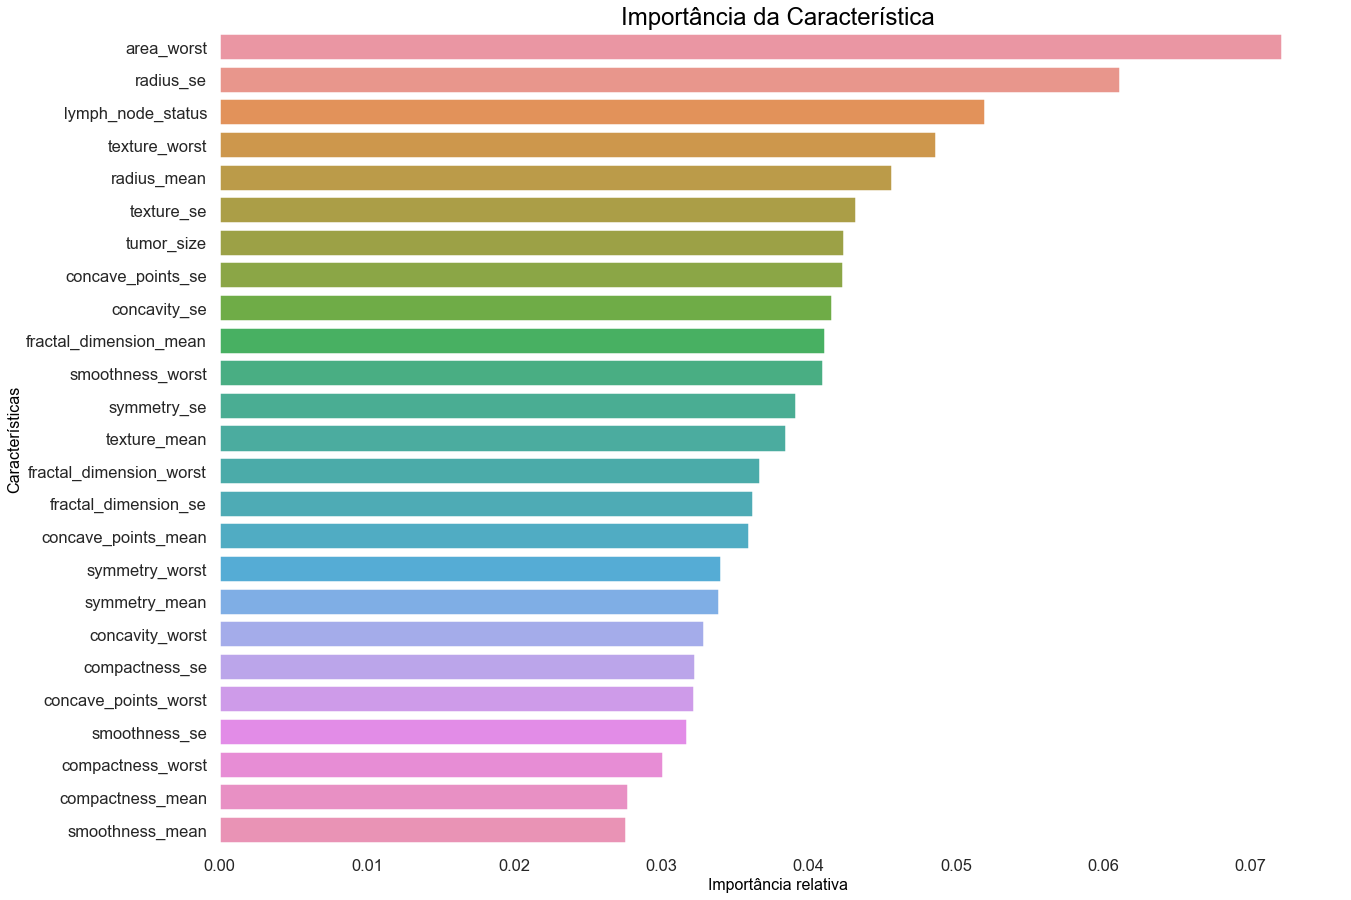

In [187]:
import matplotlib.pyplot as plt

sns.set_color_codes("dark")
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(20,15))
g = sns.barplot(x="importance", y="feature", data=df2)
g.axes.set_title('Importância da Característica', fontsize=24,color="black",alpha=2)
g.set_xlabel("Importância relativa", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

<h2>7) Outros modelos para classificação</h2>

<p> Nesse seção do trabalho, tentaremos utilizar outros métodos e algoritmos para tentar melhorar o resultado obtido em nossa predição.</p>

<h3>7.1) K-Nearest Neighbors (KNN) </h3>

In [188]:
data.head(1)

,outcome,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,0.0,18.02,27.6,0.09489,0.1036,0.07055,0.1865,0.06333,0.6249,1.89,...,37.08,1436.0,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5.0,5.0


In [189]:
#criando o modelo de aprendizagem de maquina.
namesrfc3 = ['symmetry_mean', 'texture_se', 'concavity_se', 'tumor_size', 'symmetry_se', 'compactness_mean']

X3 = data[namesrfc3]  # Características
y3 = data['outcome']

from sklearn.model_selection import train_test_split  
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30) 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train3)

X_train3 = scaler.transform(X_train3)  
X_test3 = scaler.transform(X_test3)  

In [190]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train3, y_train3)
y_pred3 = classifier.predict(X_test3)
print("Precisão:", metrics.accuracy_score(y_test3, y_pred3))

Precisão: 0.6779661016949152
